**Part 1- Neural Network**

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt
import keras.datasets.fashion_mnist as fashion_mnist

4422102/4422102 [==============================] - 1s 0us/step


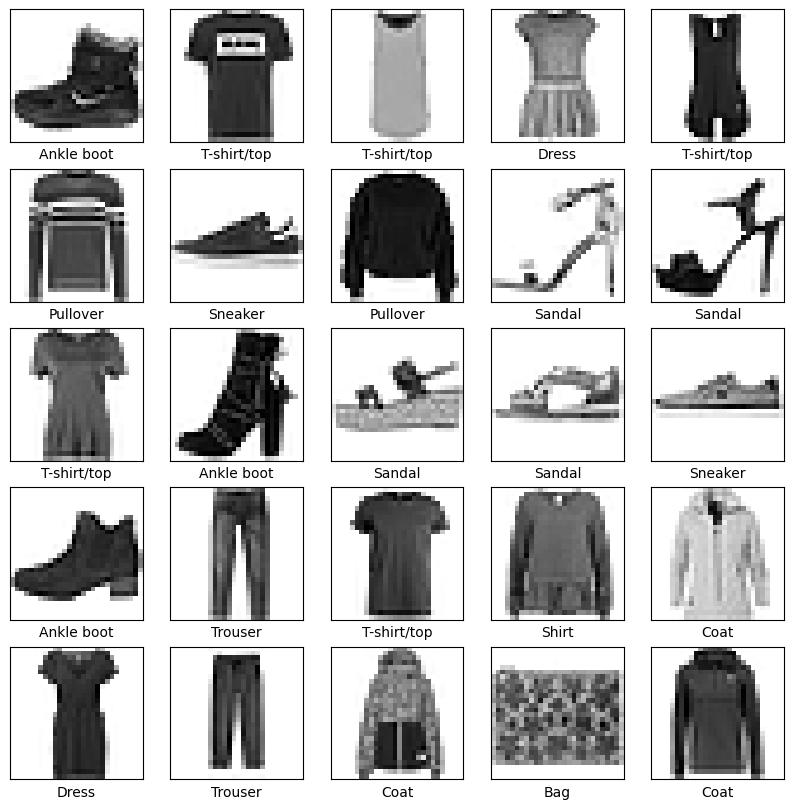

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot 4 images as gray scale
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
# flatten 28*28 images to a 784 vector for each image
IMG_HEIGHT=28
IMG_WIDTH= 28
channels =1

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
#Create the model here
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             tf.keras.layers.Dense(10, activation= 'softmax')])
model.compile(optimizer='adam', loss= loss_fn, metrics=['accuracy'])

In [7]:
# Train the model here
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
375/375 [==============================] - 6s 4ms/step - loss: 0.5742 - accuracy: 0.8046 - val_loss: 0.4726 - val_accuracy: 0.8379
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4177 - accuracy: 0.8551 - val_loss: 0.3930 - val_accuracy: 0.8611
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3818 - accuracy: 0.8673 - val_loss: 0.3960 - val_accuracy: 0.8627
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3511 - accuracy: 0.8754 - val_loss: 0.3673 - val_accuracy: 0.8691
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3308 - accuracy: 0.8819 - val_loss: 0.3575 - val_accuracy: 0.8728
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3172 - accuracy: 0.8852 - val_loss: 0.3502 - val_accuracy: 0.8768
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3019 - accuracy: 0.8906 - val_loss: 0.3366 - val_accuracy: 0.8794
Epoch 

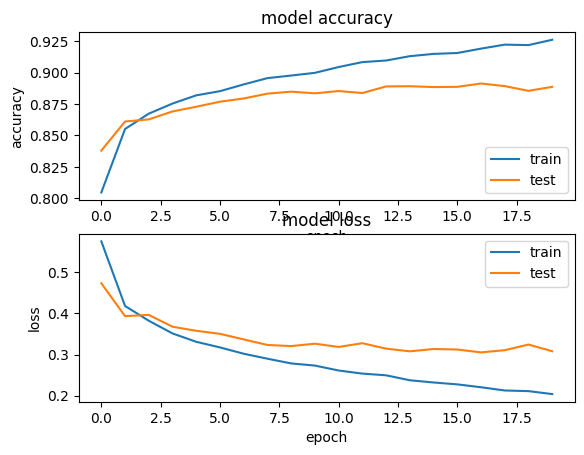

In [8]:
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

In [ ]:
# Write your understanding about this model here

**Part 2- Image Processing**

Load the Flower photo dataset from tensorflow repository

In [9]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 11s 0us/step


*a) How many images we can find in this dataset?*




In [12]:
print(data_dir)
print(type(data_dir))

/root/.keras/datasets/flower_photos
<class 'pathlib.PosixPath'>


In [15]:
image_count = len(list(data_dir.glob('*/*.jpg')))  #This will count all the file with extension of jpg- You have to modify this part
print(image_count)

3670


*b) The list of subfolders are:*
*   daisy
*   dandelion
*   roses
*   sunflowers
*   tulips

You can look into any of the subfolders to see images stored over there. You can look into the folder using: data_dir.glob('tulips/*')
For this part use Pillow (PIL) to show at least one flower from each subfolder


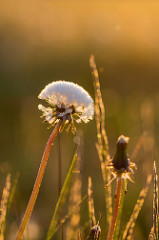

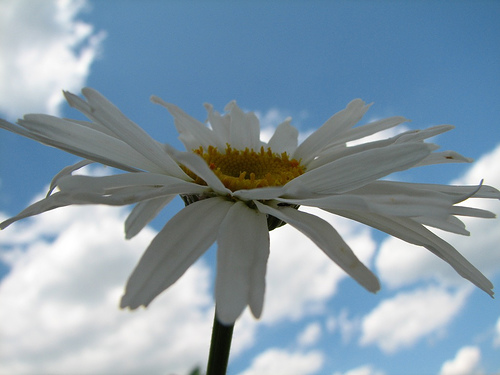

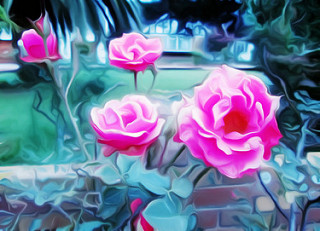

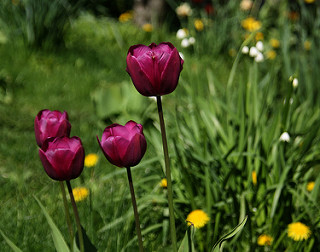

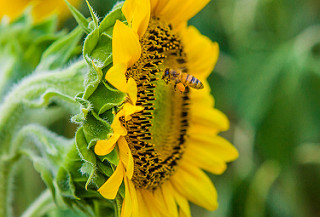

In [40]:
dataset_images = {'dandelion':[], 'daisy': [], 'roses': [], 'tulips':[], 'sunflowers': []}
for sub_dir in data_dir.glob('*/'):
    if sub_dir.is_dir():
      dir_name = sub_dir.name
      # Iterate over image files in the subdirectory
      for image_path in sub_dir.glob('*.jpg'):

          # Append the image path to the list
        dataset_images[dir_name].append(image_path)

for key in dataset_images.keys():
  img = PIL.Image.open(dataset_images[key][2])
  display(img)

*c) Use Keras to resize all the images into same dimension 180x180*

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Convert all the images in data_dir folder into 180x180 using tf.kera.utils.image_dataset_from_directory
# Modify following code
train_ds = tf.keras.utils.image_dataset_from_directory(  )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# Use the same strategy to create validation data, this time from validation subset
val_ds = tf.keras.utils.image_dataset_from_directory()


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


d) *You can use* `train_ds.class_names` *command to get the list of labels. Write a code to randomly show 9 images from training data while printing their label on top of the image.*

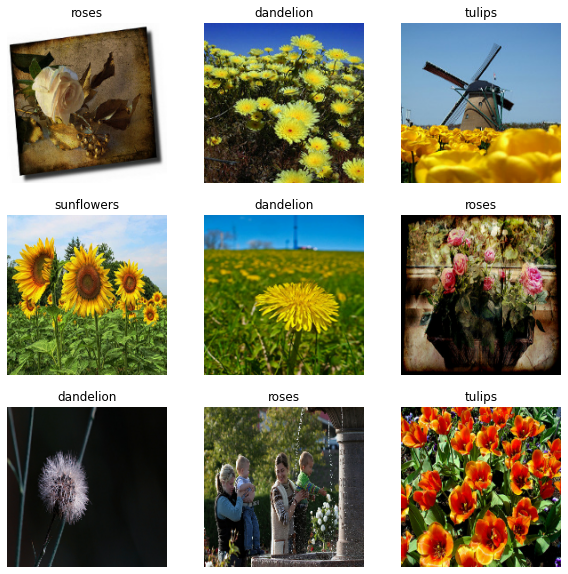

In [ ]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow()   #Modify this line
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Please carefully review the images. What are some barriers that you can see in images for having a proper classification?

*e* - *Now, we want to use preprocessing package in Keras to apply different filters to the image. Apply the following procedures to image data:*
- *Rescale the image by dividing by 255*
- *Shear the image 20%*
- *Zoom the image 20%*
- *Horizontally flip the images*

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator()  # Modify this line of code

training_set = train_datagen.flow_from_directory()   # Modify this line of code



Found 3670 images belonging to 5 classes.


**Part 3- OPENCV**- Now use opencv for preprocessing. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.

<Figure size 720x720 with 0 Axes>

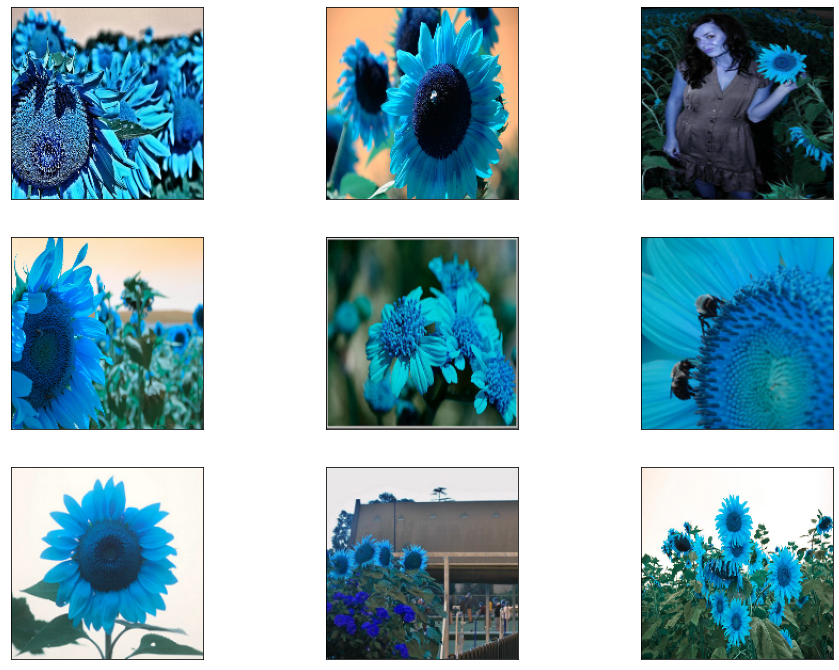

In [ ]:
# Repeat same preprocessing but this time using OpenCV. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.
import cv2
list_of_images= list(data_dir.glob('*/*.jpg'))
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
fig=plt.figure(figsize=(16, 12))

for i in range(9):
    # Add appropriate lines of code to create this output


plt.show()


OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.
`RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

<Figure size 720x720 with 0 Axes>

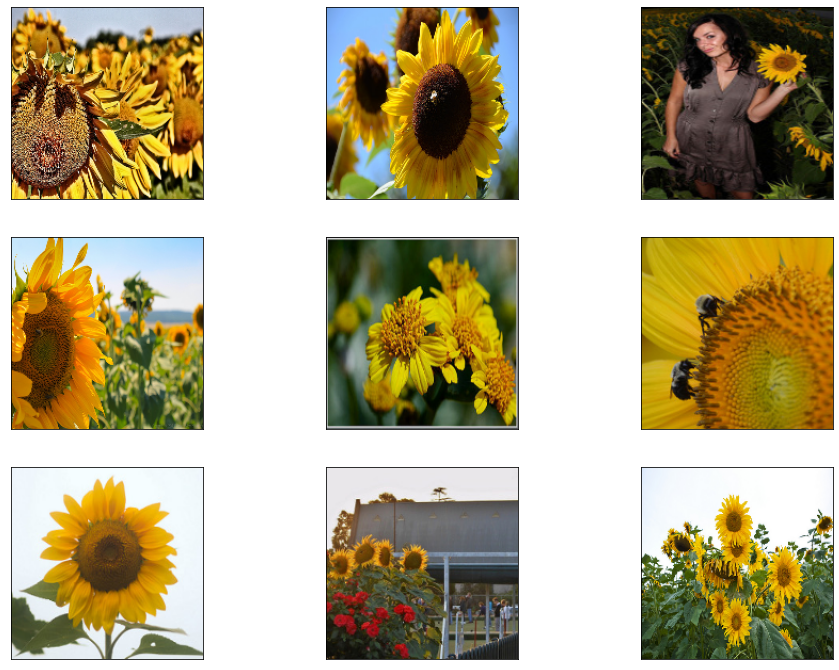

In [ ]:
# Add the code here to create the output
